In [80]:
from dealer.supplier import Csv

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
from sklearn.preprocessing import LabelEncoder

features = ['sepal_length','sepal_width','petal_length','petal_width']

df = pd.read_csv('data/iris.data', names=features + ['gold_label'])
df['target'] = LabelEncoder().fit_transform(df['gold_label'])

In [19]:
df[features].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


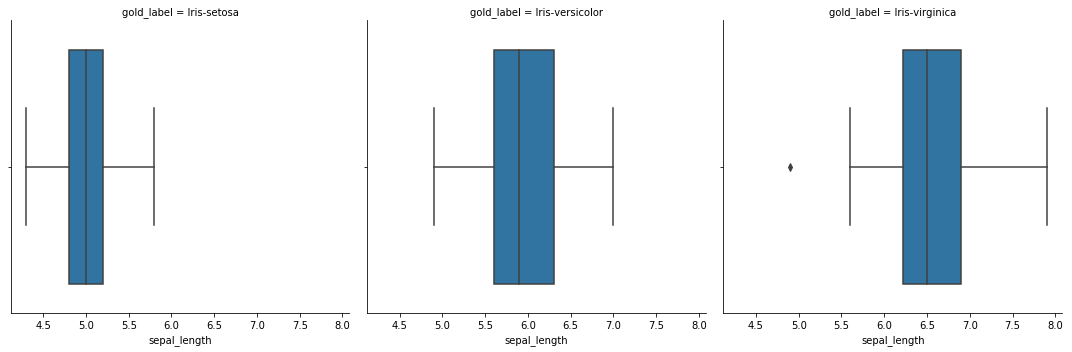

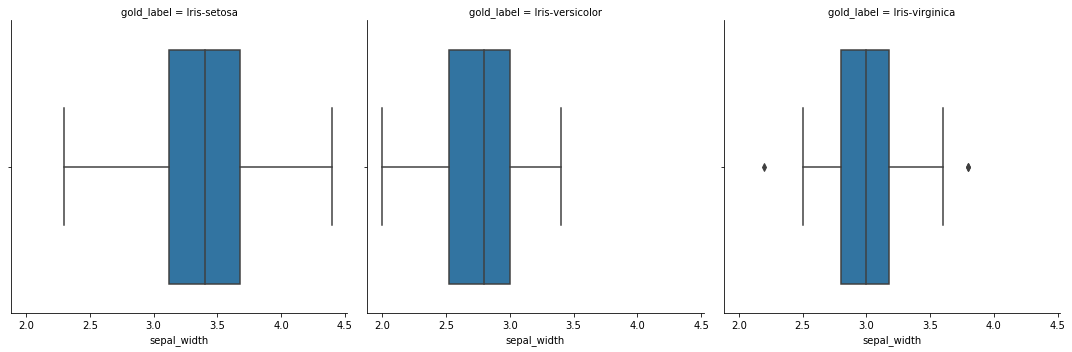

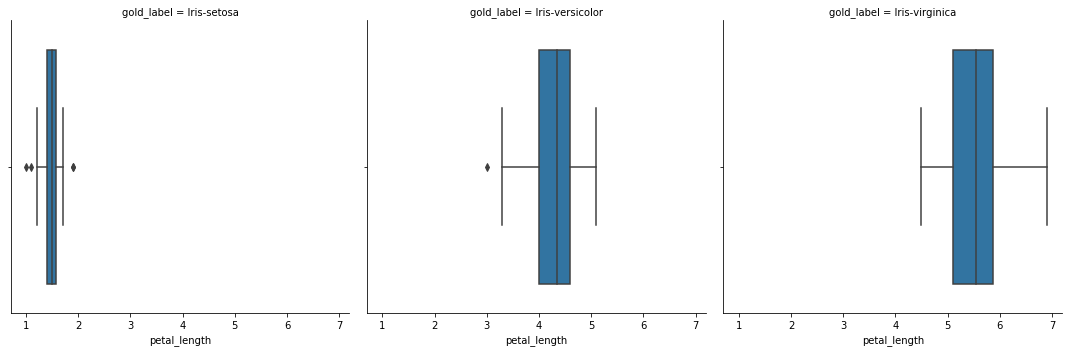

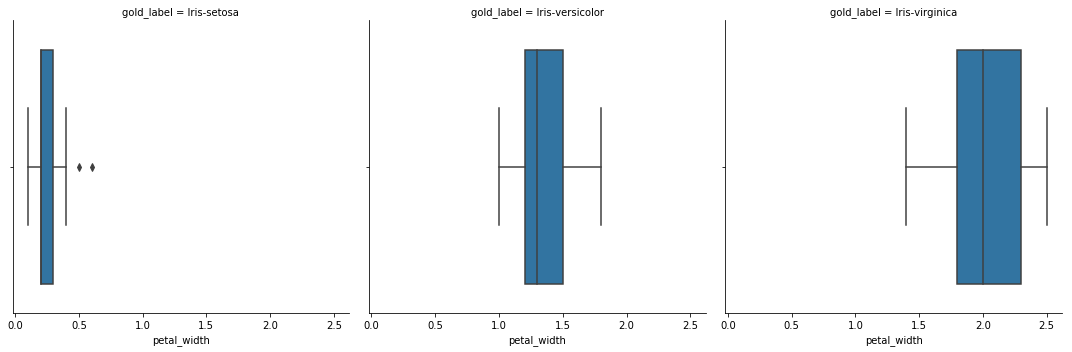

In [89]:
g = sns.FacetGrid(df, col='gold_label', col_wrap=3, height=5)
_ = g.map(sns.boxplot, 'sepal_length')

g = sns.FacetGrid(df, col='gold_label', col_wrap=3, height=5)
_ = g.map(sns.boxplot, 'sepal_width')

g = sns.FacetGrid(df, col='gold_label', col_wrap=3, height=5)
_ = g.map(sns.boxplot, 'petal_length')

g = sns.FacetGrid(df, col='gold_label', col_wrap=3, height=5)
_ = g.map(sns.boxplot, 'petal_width')

/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/Cellar/pyenv/1.2.6/versions/3.7.0/envs/venv-ds/lib/python3.7/site-packages/

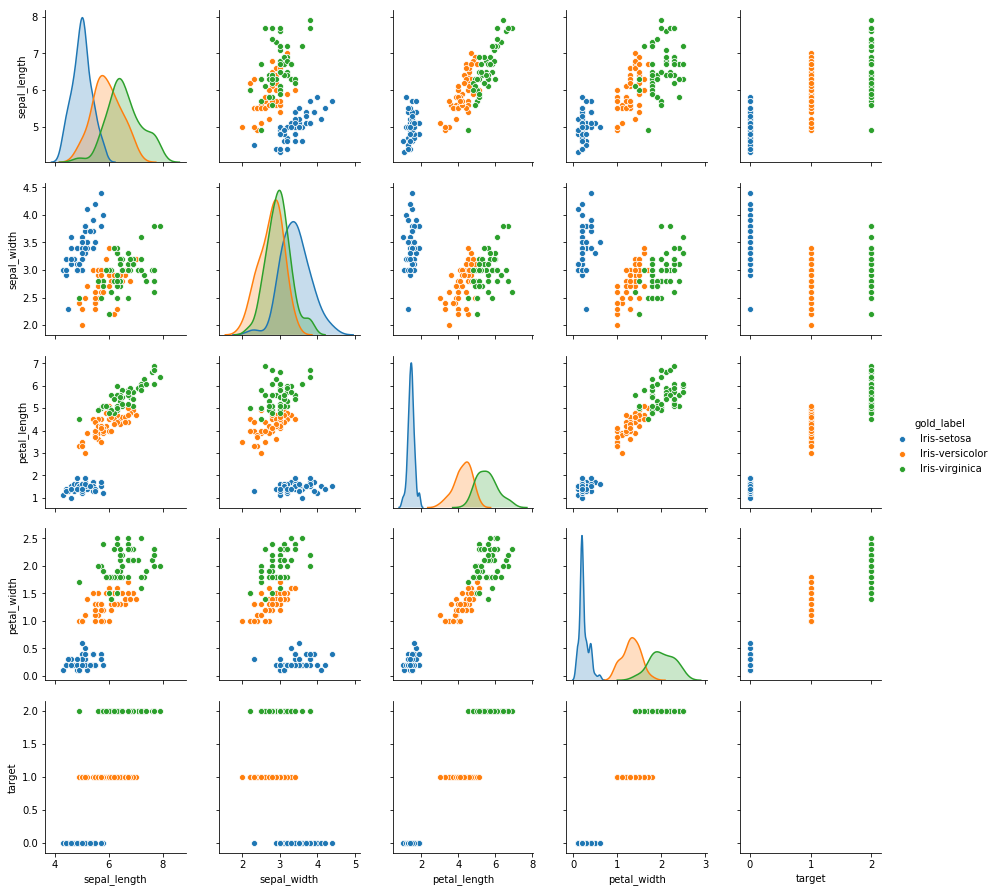

In [23]:
_ = sns.pairplot(df, hue='gold_label')

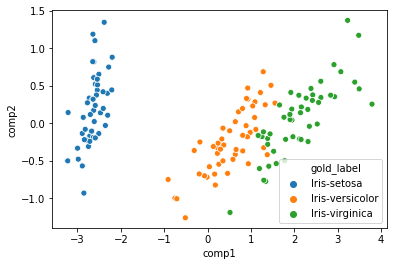

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(df[features])

df['comp1'] = pca[:,0]
df['comp2'] = pca[:,1]

_ = sns.scatterplot(x='comp1', y='comp2', data=df, hue='gold_label')

In [67]:
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth

df['kmeans'] = KMeans(n_clusters=3).fit_predict(df[['comp1','comp2']])

bandwidth = estimate_bandwidth(df[['comp1','comp2']], quantile=0.20)
df['shift'] = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(df[['comp1','comp2']])

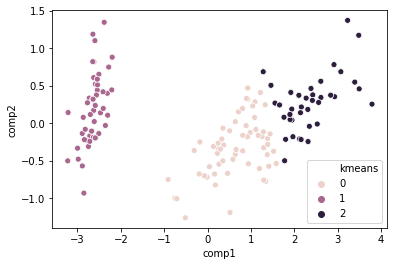

In [69]:
_ = sns.scatterplot(x='comp1', y='comp2', data=df, hue='kmeans')

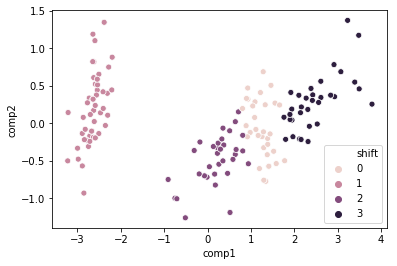

In [68]:
_ = sns.scatterplot(x='comp1', y='comp2', data=df, hue='shift')

In [72]:
from sklearn.model_selection import train_test_split

Csv().write(df, 'data/master.csv', 'overwrite')

# Write out standard train/test datasets
train, test = train_test_split(df, stratify=df['target'], random_state=1, shuffle=True)

Csv().write(train, 'data/train.csv', 'overwrite')
Csv().write(test, 'data/test.csv', 'overwrite')

2018-09-13 16:23:40,962 | dealer.supplier.Csv      |     INFO | Writing data to CSV file
2018-09-13 16:23:40,967 | dealer.supplier.Csv      |     INFO | Writing complete, 0.0s
2018-09-13 16:23:40,974 | dealer.supplier.Csv      |     INFO | Writing data to CSV file
2018-09-13 16:23:40,978 | dealer.supplier.Csv      |     INFO | Writing complete, 0.0s
2018-09-13 16:23:40,984 | dealer.supplier.Csv      |     INFO | Writing data to CSV file
2018-09-13 16:23:40,987 | dealer.supplier.Csv      |     INFO | Writing complete, 0.0s
